In [1]:
import os
import sys
import numpy as np
import math
import random

import torch
from torch.utils.data import DataLoader

import nibabel as nb
import SimpleITK as sitk
import multiprocessing

import matplotlib.pyplot as plt

In [2]:
%reload_ext autoreload
%autoreload 2

## Trained model for breast & fibroglandular tissue segmentation

In [3]:
from model import VNet
# device = torch.device('cpu')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model = VNet(n_channels=1, n_classes=3, n_filters=16, normalization='groupnorm', activation = 'ReLU')
model = model.to(device)

In [4]:
model.load_state_dict(torch.load('model/vnet_breast_0925.pth', map_location=device))

<All keys matched successfully>

## Test

In [5]:
from file_load import file_read
from dataloader_test import dataset
from test import test

In [6]:
file_path = 'sample/T1_pre.nii.gz'

niifile = file_read(file_path)

Dataset size: 1 subjects


In [7]:
test_loader = dataset(niifile, mode = 'test')

Loading and preprocessing test data...
end


Breast_vol:  1300711.5 mm / FGT_vol: 213057.0 mm


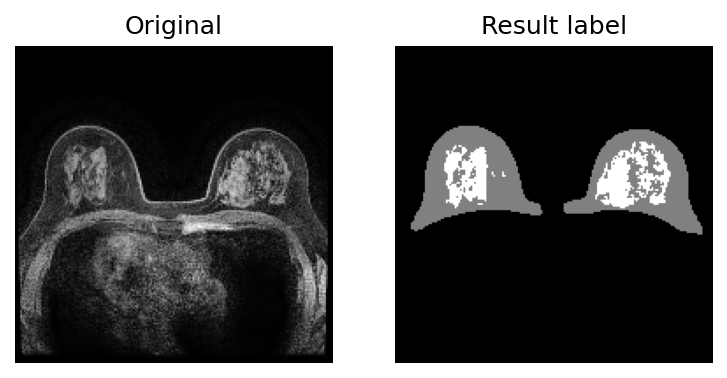

In [8]:
path_save = './'
new, prob_bst, prob_fgt = test(model,test_loader, path_save, device)